# S2_1 Time Series

In [1]:
rm(list=ls())

source("./ins_paquetes.R")
ins_paquetes('ggplot2', 'tsapp','forecast','scales', 'stats','TTR')

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'tsapp' was built under R version 3.6.3"Warning message:
"package 'vars' was built under R version 3.6.3"Warning message:
"package 'strucchange' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'sandwich' was built under R version 3.6.3"Warning message:
"package 'urca' was built under R version 3.6.3"Warning message:
"package 'lmtest' was built under R version 3.6.3"Warning message:
"package 'fftwtools' was built under R version 3.6.2"Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Attaching package: 'forecas


Bellow Packages Successfully Installed:

 ggplot2    tsapp forecast   scales    stats      TTR 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 


### Carga de librerias

In [2]:
library(ggplot2)
library(tsapp)
library(forecast)
library(scales)
library(stats)
library(TTR)

### Carga de datos

In [3]:
#Carga de datos
Yt <- read.delim("./datasets/datatesisaereo.txt", header=T)
#ts para convertir a serie de tiempo
Yt <- ts(Yt, start = c(2000, 1), freq = 12 )
Yt

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : el argumento formal "cols" concuerda con múltiples argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,354,430,393,305,327,347,392,423,354,379,419,876
2001,514,515,542,509,455,507,555,599,484,612,673,1343
2002,893,1248,1452,1323,1193,1155,1164,1055,896,847,934,1688
2003,786,818,886,620,610,550,612,544,527,445,591,1021
2004,704,686,644,511,486,552,584,469,465,477,542,921
2005,685,705,797,585,546,673,735,657,528,546,608,995
2006,662,651,647,532,551,596,627,626,580,610,702,1042
2007,924,733,720,592,602,696,707,606,661,813,846,1207
2008,897,882,837,752,771,907,915,806,856,911,1153,1541
2009,1244,1387,1505,987,1140,1303,1231,1122,1181,1363,1441,1709


### Grafico de la serie

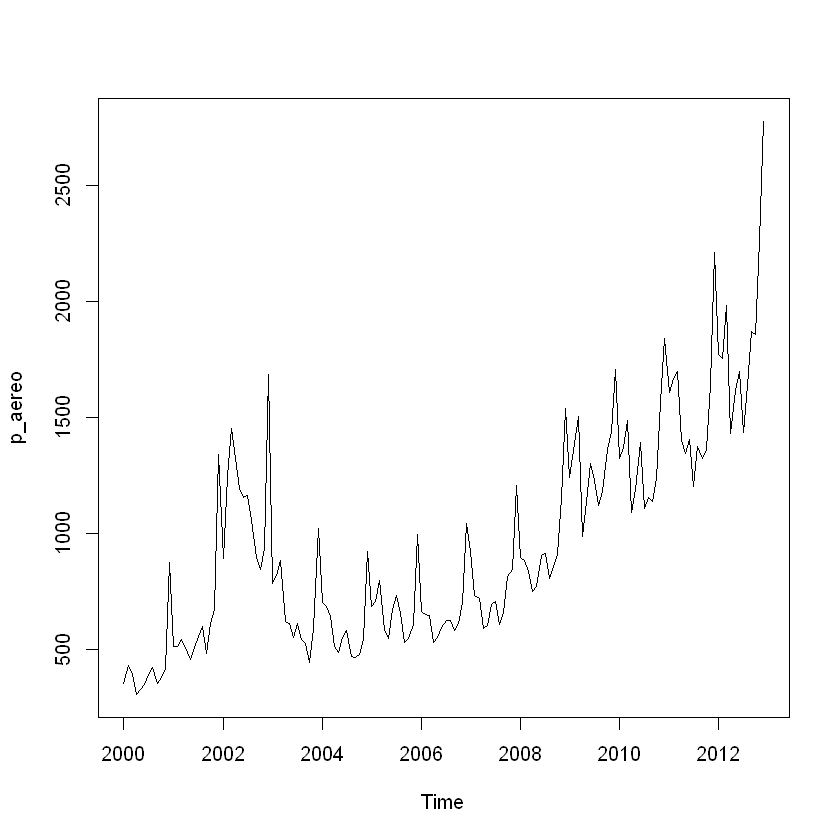

In [4]:
plot(Yt)

### Agrupacion de meses

In [5]:
cycle(Yt)

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : el argumento formal "cols" concuerda con múltiples argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,1,2,3,4,5,6,7,8,9,10,11,12
2001,1,2,3,4,5,6,7,8,9,10,11,12
2002,1,2,3,4,5,6,7,8,9,10,11,12
2003,1,2,3,4,5,6,7,8,9,10,11,12
2004,1,2,3,4,5,6,7,8,9,10,11,12
2005,1,2,3,4,5,6,7,8,9,10,11,12
2006,1,2,3,4,5,6,7,8,9,10,11,12
2007,1,2,3,4,5,6,7,8,9,10,11,12
2008,1,2,3,4,5,6,7,8,9,10,11,12
2009,1,2,3,4,5,6,7,8,9,10,11,12


### Diagrama de Cajas

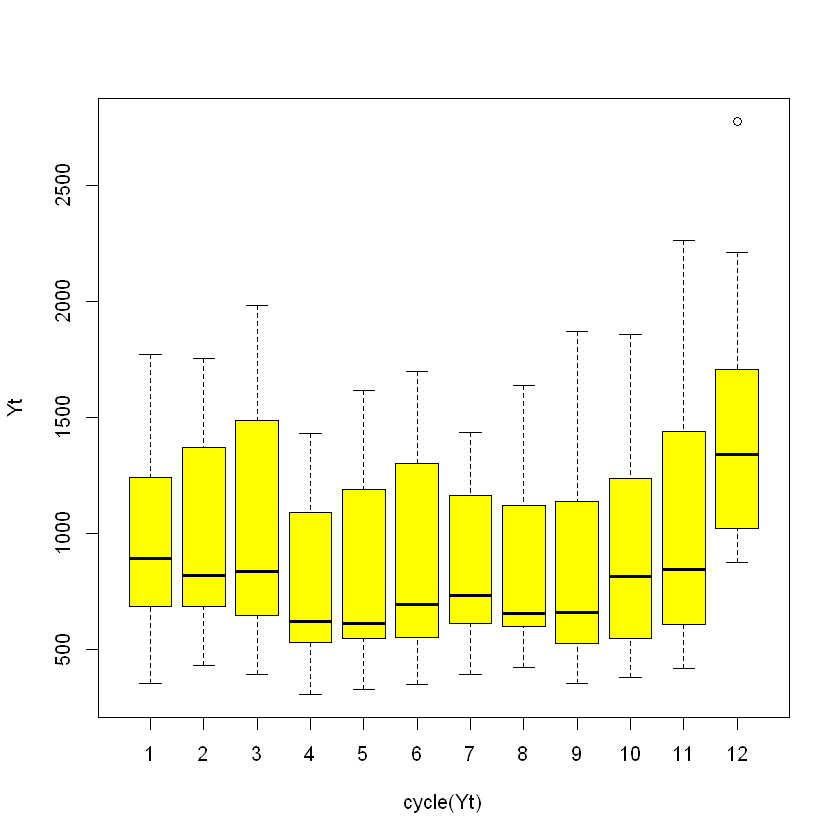

In [6]:
boxplot(Yt ~ cycle(Yt), horizontal = FALSE, col = "YELLOW") ## ALT + 126

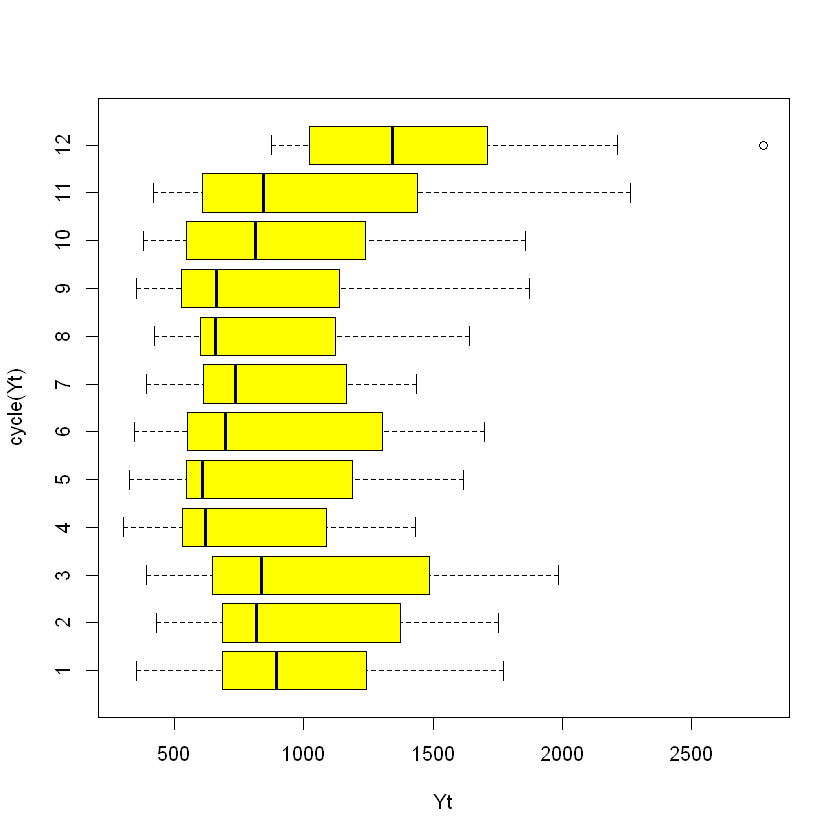

In [7]:
boxplot(Yt ~ cycle(Yt), horizontal = TRUE, col = "YELLOW") ## ALT + 126

### Descomposición de la serie de tipo multiplicativo

In [8]:
#Aplicamos la sentencia para un enf. de descomposicion
Yt.ts.desc <- decompose(Yt, type = "multiplicative")
Yt.ts.desc

$x
      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
2000  354  430  393  305  327  347  392  423  354  379  419  876
2001  514  515  542  509  455  507  555  599  484  612  673 1343
2002  893 1248 1452 1323 1193 1155 1164 1055  896  847  934 1688
2003  786  818  886  620  610  550  612  544  527  445  591 1021
2004  704  686  644  511  486  552  584  469  465  477  542  921
2005  685  705  797  585  546  673  735  657  528  546  608  995
2006  662  651  647  532  551  596  627  626  580  610  702 1042
2007  924  733  720  592  602  696  707  606  661  813  846 1207
2008  897  882  837  752  771  907  915  806  856  911 1153 1541
2009 1244 1387 1505  987 1140 1303 1231 1122 1181 1363 1441 1709
2010 1323 1373 1486 1089 1189 1394 1110 1154 1137 1238 1567 1843
2011 1609 1668 1698 1403 1346 1406 1203 1375 1324 1364 1643 2212
2012 1772 1754 1984 1432 1618 1698 1437 1639 1872 1858 2264 2779

$seasonal
           Jan       Feb       Mar       Apr       May       Jun       Jul
2

In [9]:
Yt.ts.desc$x

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : el argumento formal "cols" concuerda con múltiples argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,354,430,393,305,327,347,392,423,354,379,419,876
2001,514,515,542,509,455,507,555,599,484,612,673,1343
2002,893,1248,1452,1323,1193,1155,1164,1055,896,847,934,1688
2003,786,818,886,620,610,550,612,544,527,445,591,1021
2004,704,686,644,511,486,552,584,469,465,477,542,921
2005,685,705,797,585,546,673,735,657,528,546,608,995
2006,662,651,647,532,551,596,627,626,580,610,702,1042
2007,924,733,720,592,602,696,707,606,661,813,846,1207
2008,897,882,837,752,771,907,915,806,856,911,1153,1541
2009,1244,1387,1505,987,1140,1303,1231,1122,1181,1363,1441,1709


### Ploteo de la descomposion

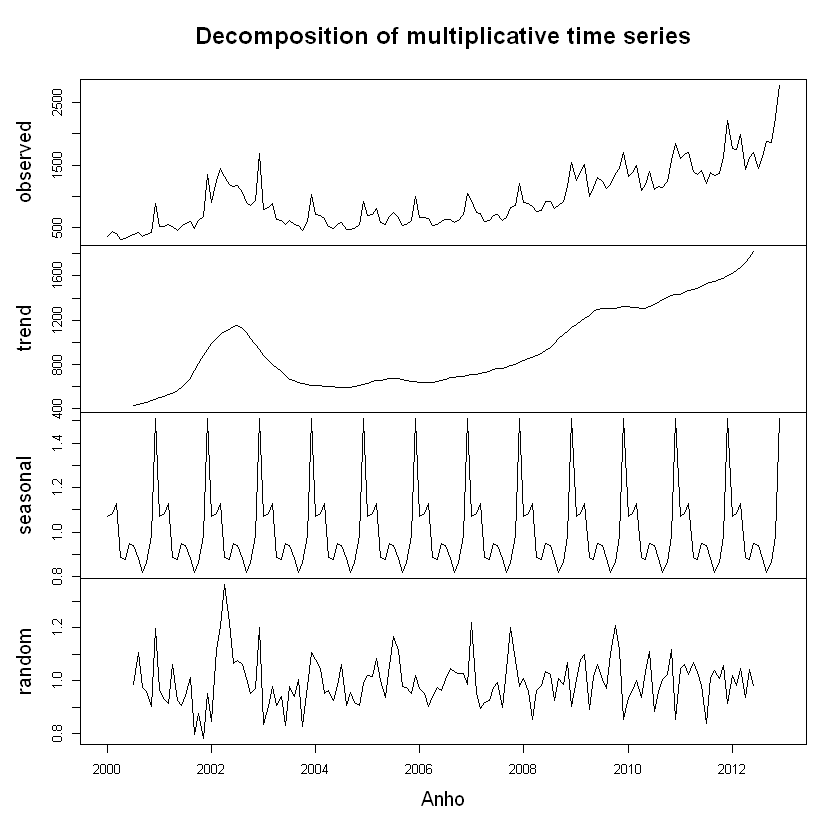

In [10]:
plot(Yt.ts.desc, xlab = 'Anho')

### Resumen de la tendencia

In [11]:
tendencia <- data.frame(Yt.ts.desc$trend)
head(tendencia, 10)

Yt.ts.desc.trend
NA
NA
NA
NA
NA
NA
423.2500
433.4583
443.2083
457.9167


In [12]:
summary(tendencia)

 Yt.ts.desc.trend
 Min.   : 423.2  
 1st Qu.: 645.2  
 Median : 806.0  
 Mean   : 939.6  
 3rd Qu.:1296.7  
 Max.   :1818.6  
 NA's   :12      

Remplazar valores nulos por 0

In [13]:
tendencia$Yt.ts.desc.trend[is.na(tendencia$Yt.ts.desc.trend)]=0

### Modelamiento de la tendencia

In [14]:
tendencia$x <- seq(1:nrow(tendencia))
tendencia$x

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156

In [15]:
modelo <- lm(Yt.ts.desc.trend ~x, data= tendencia)
tendencia_estimada <- modelo$fitted.values
head(tendencia_estimada)

1        2        3        4        5        6 
455.4575 460.7720 466.0865 471.4010 476.7155 482.0300

### Estacionalidad

In [16]:
estacional <- data.frame(Yt.ts.desc$seasonal)
head(estacional)

Yt.ts.desc.seasonal
1.0695399
1.0839904
1.1300115
0.8881280
0.8784004
0.9503415


### Estimacion de la serie en base a un modelo multiplicativo

In [17]:
dataf <- data.frame(tendencia_estimada,estacional)
colnames(dataf) <- c('tend_est','estacionalidad')

dataf$Yt_est <- dataf$tend_est*dataf$estacionalidad

### Grafico del modelo final

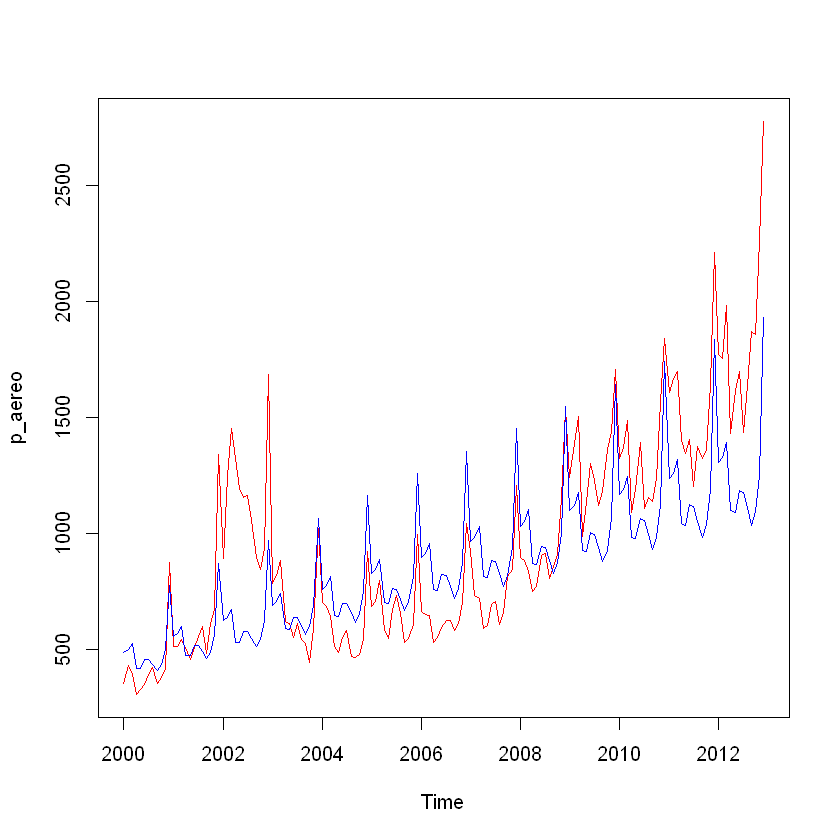

In [18]:
plot(Yt, col = "red")
points(dataf$Yt_est, type = 'l', col = 'blue' )